In [1067]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import gridspec
from matplotlib import rcParams
from scipy.optimize import curve_fit
import scipy.stats as stats
from matplotlib import lines
import seaborn as sns

import pandas as pd
import glob

#thinter to tbe able to choose a meta data file
#import tkinter as tk
#from tkinter import filedialog#to open dialog box to choose file
#from tkinter.filedialog import askopenfilename

In [1068]:
pwd

'/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/datFilesSTFX'

### HARDCODING THE IMPORT HEKA PATH

In [1069]:
# Add heka_reader to PYTHONPATH
import sys
#fpath = '/Users/Fechner/PythonStuff/heka_reader' #initial version delete
fpath = '/Users/Fechner/Dropbox/PythonImport/heka_reader' #MAC
sys.path.append(fpath)
import heka_reader

### got the heka reader from here
https://github.com/campagnola/heka_reader

- clone the repository to your computer (move to directory with terminal commands. Mine here is called PythonStuff at the moment: change name)
    - git clone https://github.com/campagnola/heka_reader.git
- the heka reader enables to read and access the .dat files (to work in jupyter notebook, you habe to append the heka_reader to the path where the heka reader is stored)
- browser.py enables to easily browse for recordings within a .dat comparable to Igor or other similar programs
- I changed the following in my local browser.py version, because the functions output was a tuple:
    - def load_clicked():
    - Display a file dialog to select a .dat file
    - file_name = pg.QtGui.QFileDialog.getOpenFileName()
    - if isinstance(file_name, tuple):   (ADDED THIS LINE)
        -    file_name = file_name[0]    (ADDED THIS LINE)
    - if file_name == '':
        -    return
    - load(file_name)

## examples of how to access data structure

    # Select a trace
    trace = bundle.pul[group_ind][series_ind][sweep_ind][trace_ind]
    
    # Print meta-data for this trace
    print(trace)
    
    # Load data for this trace
    data = bundle.data[group_id, series_id, sweep_ind, trace_ind]
    

# change file directory

In [1070]:
cd ~/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/RatioSTFX

/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/RatioSTFX


In [1071]:
#filedir ='C:/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/RatioSTFX/' #windows
filedir ='/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/Selectivity/'
filedirExportFig ='/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/AnalysisNterm/FiguresFromNotebook/'
filedirSelNterm = '/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/AnalysisNterm/SelectivityNterm/'


filenameMeta = '/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/MetaDataSTFX/'

# ENTER HARDCODED HERE: FROGS (FILES) TO USE

In [1072]:
listofFiles = ['063','064','065','068','069',
    '100','101','102','103','104','105','106','107','108','109','110','111']#'100','101','102','103','104','105',

In [1073]:
AllMetaData = pd.DataFrame()

for i in range(len(listofFiles)):
    df_temp = pd.read_excel(filenameMeta+'TEVCMetaSTFX'+listofFiles[i]+'-Selectivity.xlsx', sep="," )
    AllMetaData = AllMetaData.append(df_temp,ignore_index=True)
    #print(df_temp)
    
AllMetaData.to_csv(filedirSelNterm+'MetaSelectivityNterm-.csv', header=True, index=None, sep=',', mode='w') 

In [1074]:
filenameRatio = '/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/RatioSTFX/'

In [1075]:
TESTDIC = {"Injection":[],"CellID":[],"StartSol":[],"VrStart":[],'Iminus85Start':[],"TestSol":[],"VrTest":[],'Iminus85Test':[]}

for i in range(len(AllMetaData['CellID'])): #range(28,29
    try:
        df_temp = pd.read_csv(filenameRatio+'Selectivity-TEVC-'+AllMetaData['CellID'][i]+'.txt', sep="\t" )
    except FileNotFoundError:
        continue
    else:
        df_temp = pd.read_csv(filenameRatio+'Selectivity-TEVC-'+AllMetaData['CellID'][i]+'.txt', sep="\t" )
        #print(df_temp.head())
        if len(df_temp) % 2 == 0:
            NewLoc = 0
            #print("{0} is Even".format(len(df_temp)))
            for m in range(int(len(df_temp)/2)):

                TESTDIC["Injection"].append(df_temp.loc[m,'Injection'])
                TESTDIC["CellID"].append(df_temp.loc[NewLoc,'CellIDRec'])

                TESTDIC["StartSol"].append(df_temp.loc[NewLoc,'TestSol'])
                TESTDIC["VrStart"].append(df_temp.loc[NewLoc,'Vrev'])
                TESTDIC["Iminus85Start"].append(df_temp.loc[NewLoc,'CurMinus85'])

                TESTDIC["TestSol"].append(df_temp.loc[NewLoc+1,'TestSol'])
                TESTDIC["VrTest"].append(df_temp.loc[NewLoc+1,'Vrev'])
                TESTDIC["Iminus85Test"].append(df_temp.loc[NewLoc+1,'CurMinus85'])

                #print(NewLoc)
                NewLoc = NewLoc +2
                #print(NewLoc)
                #NewLoc = NewLoc + 10
                #print(NewLoc)

        else:
           # print("{0} is Odd".format(len(df_temp)))
            NewLoc = 0
            for m in range(int((len(df_temp)-1)/2)): #check if -1 works for more than 3 rows, for 5???
                TESTDIC["Injection"].append(df_temp.loc[NewLoc,'Injection'])
                TESTDIC["CellID"].append(df_temp.loc[NewLoc,'CellIDRec'])

                TESTDIC["StartSol"].append(df_temp.loc[NewLoc,'TestSol'])
                TESTDIC["VrStart"].append(df_temp.loc[NewLoc,'Vrev'])
                TESTDIC["Iminus85Start"].append(df_temp.loc[NewLoc,'CurMinus85'])

                TESTDIC["TestSol"].append(df_temp.loc[NewLoc+1,'TestSol'])
                TESTDIC["VrTest"].append(df_temp.loc[NewLoc+1,'Vrev'])
                TESTDIC["Iminus85Test"].append(df_temp.loc[NewLoc+1,'CurMinus85'])

                #TESTDIC["Iminus85Test"].dropna(how = 'any')
                
                #print(NewLoc)
                NewLoc = NewLoc +2

                
df = pd.DataFrame.from_dict(TESTDIC)

df = df.dropna(how='any')

df['Vd'] = df["VrTest"]-df["VrStart"]
df['Permeability'] = 1/(np.exp(df['Vd'].values*1000/25.6*-1))
df['Ratio'] = df["Iminus85Test"]/df["Iminus85Start"]


df.to_csv(filedirSelNterm+'RatioVrevSelectivityNterm-.csv', header=True, index=None, sep=',', mode='w') 

#print(df['Permeability'])


In [1076]:
filedirSelNterm

'/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/AnalysisNterm/SelectivityNterm/'

## common axis parameters

In [1077]:
AxisTickLabelSize = 8
AxisLabelSize = 10
AxisLegendSize = 8
SizeOfMarker = 3
ErrorColor = 'red'

SizeOfMarker = 2
SizeofLine = 0.5

# ENTER HERE HARDCODED THE DICTIONARY OF MUTANTS

In [1078]:
ReNameAlanin ={'F84A':'mg738mg012',# 
         'K85A':'mg739mg012',
         'E86A':'mg740mg012',
         #'F87A':'mg741mg012',
         'C88A':'mg748mg012',
         'Y89A':'mg759mg012',
         'K90A':'mg745mg012',
         #'T91A':'mg752mg012',
         #'S92A':'mg749mg012',
         'ctr A93':'mg419mg012',
         'H94A':'mg750mg012',
         #'G95A':'mg746mg012',
         #'I96A':'mg747mg012',
         'P97A':'mg760mg012',
         'M98A':'mg753mg012',
         #'I99A':'mg761mg012',
         'G100A':'mg751mg012'      
        }

ReNameChimera={ 'ctr A93':'mg419mg012',
#               'M4-DT1ABC':'mg733mg012',
#       'M4-DT1A':'mg734mg012',
#                'M4-DT1A':'mg734mg012',
#                'M4-DT1B':'mg735mg012',
               'M4-DT1C':'mg742mg012',
#                 'M4+M4-DT1A':'mg419mg734mg012',
#                'M4+M4-DT1B':'mg419mg735mg012',
#                'M4+M4-DT1C':'mg419mg742mg012',
               #'DT1-NtermM4':'mg756mg012',
               #'DT1-M4ABC':'mg736mg012',
#                'DT1-M4A':'mg737mg012',
#                'DT1-M4B':'mg757mg012',
#                'DT1-M4C':'mg758mg012',
              }

#print(ReNameAlanin)
LabelAlanin = list(ReNameAlanin.keys())
LabelChimera = list(ReNameChimera.keys())

In [1079]:
print(ReNameChimera['ctr A93'])

mg419mg012


In [1080]:
df.head()

,Injection,CellID,StartSol,VrStart,Iminus85Start,TestSol,VrTest,Iminus85Test,Vd,Permeability,Ratio
0,mg418mg419mg012,STFX063014,NaGluSel1,0.005257,1.082743e-05,KGluSel,-0.039298,1.808445e-06,-0.044554,0.175448,0.167024
3,mg418mg012,STFX063013,NaGluSel1,-0.009738,1.167834e-06,KGluSel,-0.005735,1.194372e-06,0.004003,1.169253,1.022724
6,mg418mg012,STFX063012,NaGluSel1,-0.008068,1.241020e-06,KGluSel,-0.003690,1.261510e-06,0.004379,1.186534,1.016511
9,mg418mg419mg012,STFX063011,NaGluSel1,0.008984,7.778207e-06,KGluSel,-0.025637,2.249858e-06,-0.034621,0.258626,0.289251
12,uninjected,STFX063010,NaGluSel1,-0.012328,8.655528e-08,KGluSel,0.002457,2.743892e-07,0.014786,1.781697,3.170103


In [1081]:
Allmg419Li = df.CellID[(df.TestSol == "LiGluSel") & (df.Injection == ReNameChimera['ctr A93']) ].values
Allmg742Li = df.CellID[(df.TestSol == "LiGluSel") & (df.Injection == ReNameChimera['M4-DT1C']) ].values


print(Allmg742Li)
#df[np.asarray(np.where(df == 'LiGluSel'))[0,-1]]

['STFX107007' 'STFX107008' 'STFX107025' 'STFX108016' 'STFX108024'
 'STFX108039' 'STFX109008' 'STFX109043']


error in LiGLu in STFX06026 for display....

# ENTER HERE HARDCODED THE CELL YOU WANT TO PRINT

write a loop to pick recording based on mean Current NAGlu, Vrev and change in Vrev dependent on solution switch

## chimera

In [1082]:
Rec_mg742Li = Allmg742Li[1]
File_mg742Li = "Selectivity-TEVC-"+Rec_mg742Li+".txt"
Rec_mg742LiString = Rec_mg742Li[:7] + "-" + Rec_mg742Li[7:]

Rec_mg419Li = Allmg419Li[1]
File_mg419Li = "Selectivity-TEVC-"+Rec_mg419Li+".txt"
Rec_mg419LiString = Rec_mg419Li[:7] + "-" + Rec_mg419Li[7:]


In [1083]:
Rec_mg742LiString

'STFX107-008'

In [1084]:
# test = 'Selectivity-TEVC-STFX069005.txt'
# testRecording = "STFX069005"
# test2 = "STFX069-005"

In [1085]:
#AllMetaData["CellID"] == 'mg751mg012'

# change labels for specific to recording

In [1086]:
labels_Rec_mg742Li = np.genfromtxt(File_mg742Li, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg742Li = np.genfromtxt(File_mg742Li, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg742Li = np.genfromtxt(File_mg742Li, delimiter='\t',  dtype=str)[1:,24]

labels_Rec_mg419Li = np.genfromtxt(File_mg419Li, delimiter='\t',  dtype=str)[0,:]
raw_data_Rec_mg419Li = np.genfromtxt(File_mg419Li, delimiter='\t')[1:-1,:]#[1:-1,:]
Solutions_Rec_mg419Li = np.genfromtxt(File_mg419Li, delimiter='\t',  dtype=str)[1:,24]



print(Solutions_Rec_mg419Li)
# #print(raw_data)

['NaGluSel1' 'NmgGluSel' 'NaGluSel2' 'LiGluSel' 'NaGluSel3' 'CsGluSel'
 'NaGluSel4' 'KGluSel']


In [1087]:
Solutions_Rec_mg742Li

array(['NaGluSel1', 'KGluSel', 'NaGluSel2', 'LiGluSel', 'NaGluSel3',
       'NmgGluSel', 'NaGluSel4'], dtype='<U21')

# CHANGE DIRECTORY

In [1088]:
cd ~/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/datFilesSTFX

/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/datFilesSTFX


In [1089]:
####### Hardcoding the data path to your device ####
Changefiledir ='/Users/Fechner/Box Sync/Fechner/'

#### doesn't need to be changed for TEVC analysis ###
filedirMeta = Changefiledir + 'TEVC-GoodmanlabBOX/Project-STFX/MetaDataSTFX/'
#filedirManuscript ='/Users/Fechner/Dropbox/ManuscriptFechnerPharmacology/Figures/ExportedFromNotebook/'

#CHANGE USER NAME ON PRIVATE LAPTOP TO Fechner or be more clever about the Filename
print(filedirMeta)

/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/MetaDataSTFX/


## find filename on meta data sheet

In [1090]:
#find the .dat file name in the MetaData sheet of the corresponding recording
DatFile_mg742Li = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg742Li)]
DatFile_mg419Li = AllMetaData.Filename[(AllMetaData.CellID == Rec_mg419Li)]

In [1091]:
DatFile_mg419Li

80    20181121
Name: Filename, dtype: int64

## load dat files

In [1092]:
# Load a .dat file
loadFile_mg742Li = heka_reader.Bundle(str(DatFile_mg742Li.iloc[0])+'.dat')
loadFile_mg419Li = heka_reader.Bundle(str(DatFile_mg419Li.iloc[0])+'.dat')

### find Group of recording via name

In [1093]:
for element in range(50):
    if loadFile_mg742Li.pul[element].Label == Rec_mg742LiString:
        Group_mg742Li = element
        print(Group_mg742Li)
        break
        
for element in range(50):
    if loadFile_mg419Li.pul[element].Label == Rec_mg419LiString:
        Group_mg419Li = element
        print(Group_mg419Li)
        break        
        


9
10


# find Series

# mg742

In [1094]:
VarNaGlu_mg742Li = Solutions_Rec_mg742Li[np.asarray(np.where(Solutions_Rec_mg742Li == 'LiGluSel'))[0,-1]-1]
SeriesLi_mg742Li = AllMetaData['LiGluSel'][(AllMetaData.CellID == Rec_mg742Li)].values
SeriesLi_mg742Li  = SeriesLi_mg742Li[0].split(",")
SeriesNa_mg742Li = AllMetaData[VarNaGlu_mg742Li][(AllMetaData.CellID == Rec_mg742Li)].values
SeriesNa_mg742Li  = SeriesNa_mg742Li[0].split(",")

print(SeriesLi_mg742Li)

# how to find which recording came beforehand? Solutiontest

['19', '20', '21']


# mg419

In [1095]:
Solutions_Rec_mg419Li

array(['NaGluSel1', 'NmgGluSel', 'NaGluSel2', 'LiGluSel', 'NaGluSel3',
       'CsGluSel', 'NaGluSel4', 'KGluSel'], dtype='<U21')

In [1096]:
VarNaGlu_mg419Li = Solutions_Rec_mg419Li[np.asarray(np.where(Solutions_Rec_mg419Li == 'LiGluSel'))[0,-1]-1]
SeriesLi_mg419Li = AllMetaData['LiGluSel'][(AllMetaData.CellID == Rec_mg419Li)].values
SeriesLi_mg419Li  = SeriesLi_mg419Li[0].split(",")
SeriesNa_mg419Li = AllMetaData[VarNaGlu_mg419Li][(AllMetaData.CellID == Rec_mg419Li)].values
SeriesNa_mg419Li  = SeriesNa_mg419Li[0].split(",")


AllMetaData['NaGluSel4'][(AllMetaData.CellID == Rec_mg419Li)].values

print(SeriesNa_mg419Li)

['11', '12', '13']


In [1097]:
SeriesLi_mg419Li

['15', '16', '17']

In [1098]:
VarNaGlu_mg419Li

'NaGluSel2'

## voltage trace

In [1099]:
Vol_mg419Li1 = []
for i in range(0,9):#(0,len(tt)):
    Vol_mg419Li1.append(loadFile_mg419Li.data[Group_mg419Li,int(SeriesNa_mg419Li[0])-1,i,1])
    
Vol_mg419Li2 = []
for j in range(0,9):#(0,len(tt)):
    Vol_mg419Li2.append(loadFile_mg419Li.data[Group_mg419Li,int(SeriesNa_mg419Li[1])-1,j,1])
    
Vol_mg419Li3 = []
for k in range(0,9):#(0,len(tt)):
    Vol_mg419Li3.append(loadFile_mg419Li.data[Group_mg419Li,int(SeriesNa_mg419Li[2])-1,k,1])
    
Vol_mg419LiMEAN =[]
for m in range(0,9):
    Vol_mg419LiMEAN.append(((Vol_mg419Li1[m]+Vol_mg419Li2[m]+Vol_mg419Li3[m])/3)*1000)

## current traces

### NaGlu mg419 and LiGlu mg419

In [1100]:
INa_mg419Li1 = []
for i in range(0,9):#(0,len(tt)):
    INa_mg419Li1.append(loadFile_mg419Li.data[Group_mg419Li,int(SeriesNa_mg419Li[0])-1,i,0])
    
INa_mg419Li2 = []
for j in range(0,9):#(0,len(tt)):
    INa_mg419Li2.append(loadFile_mg419Li.data[Group_mg419Li,int(SeriesNa_mg419Li[1])-1,j,0])
    
INa_mg419Li3 = []
for k in range(0,9):#(0,len(tt)):
    INa_mg419Li3.append(loadFile_mg419Li.data[Group_mg419Li,int(SeriesNa_mg419Li[2])-1,k,0])
    
INa_mg419LiMEAN =[]
for m in range(0,9):
    INa_mg419LiMEAN.append(((INa_mg419Li1[m]+INa_mg419Li2[m]+INa_mg419Li3[m])/3)*1000000)

In [1101]:
ILi_mg419Li1 = []
for i in range(0,9):#(0,len(tt)):
    ILi_mg419Li1.append(loadFile_mg419Li.data[Group_mg419Li,int(SeriesLi_mg419Li[0])-1,i,0])
    
ILi_mg419Li2 = []
for j in range(0,9):#(0,len(tt)):
    ILi_mg419Li2.append(loadFile_mg419Li.data[Group_mg419Li,int(SeriesLi_mg419Li[1])-1,j,0])
    
ILi_mg419Li3 = []
for k in range(0,9):#(0,len(tt)):
    ILi_mg419Li3.append(loadFile_mg419Li.data[Group_mg419Li,int(SeriesLi_mg419Li[2])-1,k,0])
    
ILi_mg419LiMEAN =[]
for m in range(0,9):
    ILi_mg419LiMEAN.append(((ILi_mg419Li1[m]+ILi_mg419Li2[m]+ILi_mg419Li3[m])/3)*1000000)

### NaGlu mg742 and LiGlu mg742

# Transform Data from Selectivity_Ratio sheet 

### mg419 LiGLu

In [1102]:
#######################
Voltages_mg419Li = []
Currents_mg419Li = []

for volt in range(0,len(raw_data_Rec_mg419Li)):
    Voltages_mg419Li.append([raw_data_Rec_mg419Li[volt,5:14]]) #TODO: CHANGE
    Currents_mg419Li.append([raw_data_Rec_mg419Li[volt,14:23]])

#change to mV and uA    
Voltages_mg419LiInmV = np.multiply(1000,Voltages_mg419Li) #becomes a np.array with shape 7,1,9 
Currents_mg419LiInuA = np.multiply(1000000,Currents_mg419Li)    
  
#reshape Array
Voltages_mg419LiInmV = Voltages_mg419LiInmV.reshape(Voltages_mg419LiInmV.shape[0],Voltages_mg419LiInmV.shape[2]) #reshape 7,1,9 
Currents_mg419LiInuA = Currents_mg419LiInuA.reshape(Currents_mg419LiInuA.shape[0],Currents_mg419LiInuA.shape[2])   


### mg742 LiGlu


In [1103]:
#######################
Voltages_mg742Li = []
Currents_mg742Li = []

for volt in range(0,len(raw_data_Rec_mg742Li)):
    Voltages_mg742Li.append([raw_data_Rec_mg742Li[volt,5:14]]) #TODO: CHANGE
    Currents_mg742Li.append([raw_data_Rec_mg742Li[volt,14:23]])

#change to mV and uA    
Voltages_mg742LiInmV = np.multiply(1000,Voltages_mg742Li) #becomes a np.array with shape 7,1,9 
Currents_mg742LiInuA = np.multiply(1000000,Currents_mg742Li)    
  
#reshape Array
Voltages_mg742LiInmV = Voltages_mg742LiInmV.reshape(Voltages_mg742LiInmV.shape[0],Voltages_mg742LiInmV.shape[2]) #reshape 7,1,9 
Currents_mg742LiInuA = Currents_mg742LiInuA.reshape(Currents_mg742LiInuA.shape[0],Currents_mg742LiInuA.shape[2])   


Text(-110, 20.8, 'mg742 LiGlu')

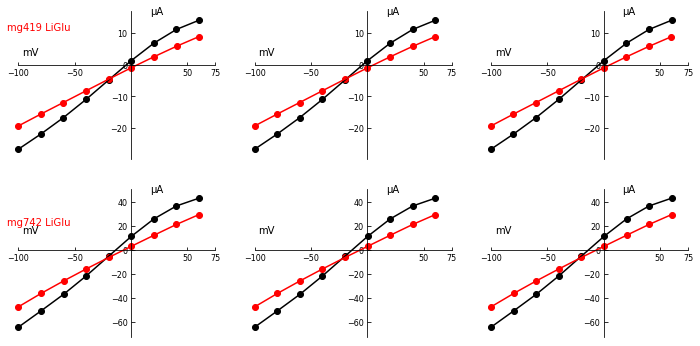

In [1105]:
#index into Voltage 1 to Voltage 9 AND index into MeandStep1 to 9 (Currents) and rename  
#TODO: change to not hardcoded if order in textfile changes

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
# if nrows = 2 axes[] counts rows and not col and limits axess handling

axes[0][0] = plt.subplot(2,3,1)
plt.plot(Voltages_mg419LiInmV[np.asarray(np.where(Solutions_Rec_mg419Li == VarNaGlu_mg419Li))[0,-1]],Currents_mg419LiInuA[np.asarray(np.where(Solutions_Rec_mg419Li == VarNaGlu_mg419Li))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg419LiInmV[np.asarray(np.where(Solutions_Rec_mg419Li == VarNaGlu_mg419Li))[0,-1]],Currents_mg419LiInuA[np.asarray(np.where(Solutions_Rec_mg419Li == VarNaGlu_mg419Li))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg419LiInmV[np.asarray(np.where(Solutions_Rec_mg419Li == 'LiGluSel'))[0,-1]],Currents_mg419LiInuA[np.asarray(np.where(Solutions_Rec_mg419Li == 'LiGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg419LiInmV[np.asarray(np.where(Solutions_Rec_mg419Li == 'LiGluSel'))[0,-1]],Currents_mg419LiInuA[np.asarray(np.where(Solutions_Rec_mg419Li == 'LiGluSel'))[0,-1]],color = 'red',clip_on=False)    


axes[0][1] = plt.subplot(2,3,2)
plt.plot(Voltages_mg419LiInmV[np.asarray(np.where(Solutions_Rec_mg419Li == VarNaGlu_mg419Li))[0,-1]],Currents_mg419LiInuA[np.asarray(np.where(Solutions_Rec_mg419Li == VarNaGlu_mg419Li))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg419LiInmV[np.asarray(np.where(Solutions_Rec_mg419Li == VarNaGlu_mg419Li))[0,-1]],Currents_mg419LiInuA[np.asarray(np.where(Solutions_Rec_mg419Li == VarNaGlu_mg419Li))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg419LiInmV[np.asarray(np.where(Solutions_Rec_mg419Li == 'LiGluSel'))[0,-1]],Currents_mg419LiInuA[np.asarray(np.where(Solutions_Rec_mg419Li == 'LiGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg419LiInmV[np.asarray(np.where(Solutions_Rec_mg419Li == 'LiGluSel'))[0,-1]],Currents_mg419LiInuA[np.asarray(np.where(Solutions_Rec_mg419Li == 'LiGluSel'))[0,-1]],color = 'red',clip_on=False)    

axes[0][2] = plt.subplot(2,3,3)
plt.plot(Voltages_mg419LiInmV[np.asarray(np.where(Solutions_Rec_mg419Li == VarNaGlu_mg419Li))[0,-1]],Currents_mg419LiInuA[np.asarray(np.where(Solutions_Rec_mg419Li == VarNaGlu_mg419Li))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg419LiInmV[np.asarray(np.where(Solutions_Rec_mg419Li == VarNaGlu_mg419Li))[0,-1]],Currents_mg419LiInuA[np.asarray(np.where(Solutions_Rec_mg419Li == VarNaGlu_mg419Li))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg419LiInmV[np.asarray(np.where(Solutions_Rec_mg419Li == 'LiGluSel'))[0,-1]],Currents_mg419LiInuA[np.asarray(np.where(Solutions_Rec_mg419Li == 'LiGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg419LiInmV[np.asarray(np.where(Solutions_Rec_mg419Li == 'LiGluSel'))[0,-1]],Currents_mg419LiInuA[np.asarray(np.where(Solutions_Rec_mg419Li == 'LiGluSel'))[0,-1]],color = 'red',clip_on=False)    

# ###################################### mg742 
axes[1][0] = plt.subplot(2,3,4)
plt.plot(Voltages_mg742LiInmV[np.asarray(np.where(Solutions_Rec_mg742Li == VarNaGlu_mg742Li))[0,-1]],Currents_mg742LiInuA[np.asarray(np.where(Solutions_Rec_mg742Li == VarNaGlu_mg742Li))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg742LiInmV[np.asarray(np.where(Solutions_Rec_mg742Li == VarNaGlu_mg742Li))[0,-1]],Currents_mg742LiInuA[np.asarray(np.where(Solutions_Rec_mg742Li == VarNaGlu_mg742Li))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg742LiInmV[np.asarray(np.where(Solutions_Rec_mg742Li == 'LiGluSel'))[0,-1]],Currents_mg742LiInuA[np.asarray(np.where(Solutions_Rec_mg742Li == 'LiGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg742LiInmV[np.asarray(np.where(Solutions_Rec_mg742Li == 'LiGluSel'))[0,-1]],Currents_mg742LiInuA[np.asarray(np.where(Solutions_Rec_mg742Li == 'LiGluSel'))[0,-1]],color = 'red',clip_on=False)    

axes[1][1] = plt.subplot(2,3,5)
plt.plot(Voltages_mg742LiInmV[np.asarray(np.where(Solutions_Rec_mg742Li == VarNaGlu_mg742Li))[0,-1]],Currents_mg742LiInuA[np.asarray(np.where(Solutions_Rec_mg742Li == VarNaGlu_mg742Li))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg742LiInmV[np.asarray(np.where(Solutions_Rec_mg742Li == VarNaGlu_mg742Li))[0,-1]],Currents_mg742LiInuA[np.asarray(np.where(Solutions_Rec_mg742Li == VarNaGlu_mg742Li))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg742LiInmV[np.asarray(np.where(Solutions_Rec_mg742Li == 'LiGluSel'))[0,-1]],Currents_mg742LiInuA[np.asarray(np.where(Solutions_Rec_mg742Li == 'LiGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg742LiInmV[np.asarray(np.where(Solutions_Rec_mg742Li == 'LiGluSel'))[0,-1]],Currents_mg742LiInuA[np.asarray(np.where(Solutions_Rec_mg742Li == 'LiGluSel'))[0,-1]],color = 'red',clip_on=False)    

axes[1][2] = plt.subplot(2,3,6)
plt.plot(Voltages_mg742LiInmV[np.asarray(np.where(Solutions_Rec_mg742Li == VarNaGlu_mg742Li))[0,-1]],Currents_mg742LiInuA[np.asarray(np.where(Solutions_Rec_mg742Li == VarNaGlu_mg742Li))[0,-1]],'black',clip_on=False)
plt.scatter(Voltages_mg742LiInmV[np.asarray(np.where(Solutions_Rec_mg742Li == VarNaGlu_mg742Li))[0,-1]],Currents_mg742LiInuA[np.asarray(np.where(Solutions_Rec_mg742Li == VarNaGlu_mg742Li))[0,-1]],color = 'black',clip_on=False)    
plt.plot(Voltages_mg742LiInmV[np.asarray(np.where(Solutions_Rec_mg742Li == 'LiGluSel'))[0,-1]],Currents_mg742LiInuA[np.asarray(np.where(Solutions_Rec_mg742Li == 'LiGluSel'))[0,-1]],'red',clip_on=False)
plt.scatter(Voltages_mg742LiInmV[np.asarray(np.where(Solutions_Rec_mg742Li == 'LiGluSel'))[0,-1]],Currents_mg742LiInuA[np.asarray(np.where(Solutions_Rec_mg742Li == 'LiGluSel'))[0,-1]],color = 'red',clip_on=False)    
# 

###########################
xlimSet = [-100,75]
xticksSet=[-100,-50,50,75]

#add ylim

for row in range(2): 
    for col in range(3):
        axes[row][col].set_xlim(xlimSet)
        axes[row][col].set_xticks(xticksSet)
        # Hide the right and top spines
        axes[row][col].spines['right'].set_visible(False)
        axes[row][col].spines['top'].set_visible(False)
        # Only show ticks on the left and bottom spines
        axes[row][col].yaxis.set_ticks_position('left')
        axes[row][col].xaxis.set_ticks_position('bottom')
        axes[row][col].get_yaxis().set_tick_params(direction='in')
        axes[row][col].get_xaxis().set_tick_params(direction='in')
        # Move left y-axis and bottim x-axis to centre, passing through (0,0)
        axes[row][col].spines['left'].set_position('zero')
        axes[row][col].spines['bottom'].set_position('zero')
        axes[row][col].set_xlabel('mV',fontsize=AxisLabelSize)
        axes[row][col].set_ylabel('µA',rotation=0,fontsize=AxisLabelSize)
        axes[row][col].xaxis.set_label_coords(0.06,0.75)
        axes[row][col].yaxis.set_label_coords(0.7,0.96)
        axes[row][col].tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  


axes[0][0].text(-110, 10.8, 'mg419 LiGlu',color='red',fontsize=AxisLabelSize)
axes[1][0].text(-110, 20.8, 'mg742 LiGlu',color='red',fontsize=AxisLabelSize)
